In [13]:
import json
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import openweathermapy.core as ow

In [15]:
# Get random geo-coordinates 
lats = np.random.uniform(-90,90,1500)
longs = np.random.uniform(-180,180,1500)
zip_coord_cities = zip(lats, longs)

In [17]:
# Use citypy library for nearby cities
cities = []
for coordinate_pair in zip_coord_cities:
   lat, lon = coordinate_pair
   #city = citipy.nearest_city(lat, lon).city_name
   city = citipy.nearest_city(lat, lon)
   if city not in cities:
       cities.append(city)
print(len(cities))

608


In [21]:
# Create a dataframe for the cities list
cities_df = pd.DataFrame(cities)

In [23]:
# Get city name and corresponding country code
cities_name=[]
countrycode=[]
for city in cities:
    country = city.country_code
    name = city.city_name
    cities_name.append(name)
    countrycode.append(country)

cities_df['City']=cities_name
cities_df['Country']=countrycode
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000001F1EBB33780>,lavrentiya,ru
1,<citipy.citipy.City object at 0x000001F1EA7504E0>,terrace,ca
2,<citipy.citipy.City object at 0x000001F1EBCDF160>,barentsburg,sj
3,<citipy.citipy.City object at 0x000001F1EAA3D390>,juelsminde,dk
4,<citipy.citipy.City object at 0x000001F1EBBB95F8>,pevek,ru


In [24]:
# Drop duplicate cities in 'City'
cities_df = cities_df.drop_duplicates("City")
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000001F1EBB33780>,lavrentiya,ru
1,<citipy.citipy.City object at 0x000001F1EA7504E0>,terrace,ca
2,<citipy.citipy.City object at 0x000001F1EBCDF160>,barentsburg,sj
3,<citipy.citipy.City object at 0x000001F1EAA3D390>,juelsminde,dk
4,<citipy.citipy.City object at 0x000001F1EBBB95F8>,pevek,ru


In [25]:
api_key=""
cities_df["Latitude"] =""
cities_df["Temperature"] =""
cities_df["Humidity"] = ""
cities_df["Cloud Cover"] = ""
cities_df["Wind Speed"] = ""
cities_df["Date"] =""
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001F1EBB33780>,lavrentiya,ru,,,,,,
1,<citipy.citipy.City object at 0x000001F1EA7504E0>,terrace,ca,,,,,,
2,<citipy.citipy.City object at 0x000001F1EBCDF160>,barentsburg,sj,,,,,,
3,<citipy.citipy.City object at 0x000001F1EAA3D390>,juelsminde,dk,,,,,,
4,<citipy.citipy.City object at 0x000001F1EBBB95F8>,pevek,ru,,,,,,


In [26]:
print(len(cities))

608


In [27]:
# Get api-key for openweathermap current weather api
api_key = "8f1b9cd4a84af0404d4d40da7aa2636c"

# Create an empty list to store our JSON response objects
#weather_data = []

# Loop through cities dataframe and run a weather search for each city
for index, row in cities_df.iterrows():
        url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), api_key)
        weather = req.get(url).json()
        try:
            cities_df.set_value(index, "Temperature", weather["main"]["temp"])
            cities_df.set_value(index, "Humidity", weather["main"]["humidity"])
            cities_df.set_value(index, "Cloud Cover", weather["clouds"]["all"])
            cities_df.set_value(index, "Wind Speed", weather["wind"]["speed"])
            cities_df.set_value(index, "Date", weather["dt"])
            cities_df.set_value(index, "Latitude", weather["coord"]["lat"])  
            
            print("City id: " + str(weather['id']) + " and City name: " + weather['name'])
            print(url) 
        
        except:
            print("Missing data. Skipping!!!")
               
        #weather_data.append(req.get(url).json())
#print(weather_data[0])

# Replace whitespaces in columns with NaN
# cities_df.replace(r'', np.NaN)  

# cities_df = cities_df.drop('0', 1)

# Remove all rows with NaN entries
# cities_df.dropna(how='any') 

# Fill NaN entries with 0

cities_df.fillna(0).head()

City id: 4031637 and City name: Lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6162949 and City name: Terrace
http://api.openweathermap.org/data/2.5/weather?q=terrace&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2619251 and City name: Juelsminde
http://api.openweathermap.org/data/2.5/weather?q=juelsminde&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2122090 and City name: Pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2022572 and City name: Khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6320062 and City name: Vila Velha
http://api.openweathermap.org/data/2.5/weather?q=vila+velha&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7

City id: 3459867 and City name: Joaima
http://api.openweathermap.org/data/2.5/weather?q=joaima&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2173323 and City name: Bundaberg
http://api.openweathermap.org/data/2.5/weather?q=bundaberg&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2077895 and City name: Alice Springs
http://api.openweathermap.org/data/2.5/weather?q=alice+springs&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3115824 and City name: Muros
http://api.openweathermap.org/data/2.5/weather?q=muros&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6111862 and City name: Port Hardy
http://api.openweathermap.org/data/2.5/weather?q=port+hardy&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3355672 and City name: Luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Sk

Missing data. Skipping!!!
City id: 679959 and City name: Cungrea
http://api.openweathermap.org/data/2.5/weather?q=cungrea&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2173911 and City name: Broken Hill
http://api.openweathermap.org/data/2.5/weather?q=broken+hill&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1490256 and City name: Talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2136150 and City name: Luganville
http://api.openweathermap.org/data/2.5/weather?q=luganville&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2121385 and City name: Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4035715 and City name: Avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af040

City id: 2027244 and City name: Bagdarin
http://api.openweathermap.org/data/2.5/weather?q=bagdarin&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2127202 and City name: Anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4013704 and City name: Laguna
http://api.openweathermap.org/data/2.5/weather?q=laguna&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6355222 and City name: Yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6145425 and City name: Shaunavon
http://api.openweathermap.org/data/2.5/weather?q=shaunavon&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 5991055 and City name: Kenora
http://api.openweathermap.org/data/2.5/weather?q=kenora&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3

City id: 3650121 and City name: Olinda
http://api.openweathermap.org/data/2.5/weather?q=olinda&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1510377 and City name: Belyy Yar
http://api.openweathermap.org/data/2.5/weather?q=belyy+yar&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1803841 and City name: Lianzhou
http://api.openweathermap.org/data/2.5/weather?q=lianzhou&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5367788 and City name: Lompoc
http://api.openweathermap.org/data/2.5/weather?q=lompoc&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 787487 and City name: Poum
http://api.openweathermap.org/data/2.5/weather?q=poum&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 57289 and City name: Hargeysa
http://api.openweathermap.org/data/2.5/weather?q=hargeysa&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2094342 and City name: Kavieng

City id: 2208485 and City name: Zlitan
http://api.openweathermap.org/data/2.5/weather?q=zlitan&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1667031 and City name: Wufeng
http://api.openweathermap.org/data/2.5/weather?q=wufeng&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 244878 and City name: Biltine
http://api.openweathermap.org/data/2.5/weather?q=biltine&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2925533 and City name: Hainburg
http://api.openweathermap.org/data/2.5/weather?q=hainburg&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 287286 and City name: Muscat
http://api.openweathermap.org/data/2.5/weather?q=muscat&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 587876 and City name: Soe
http://api.openweathermap.org/data/2.5/weather?q=soe&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1795424 and City name: Huilong
http://ap

City id: 3489005 and City name: Port Antonio
http://api.openweathermap.org/data/2.5/weather?q=port+antonio&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4732862 and City name: Nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5769288 and City name: Spearfish
http://api.openweathermap.org/data/2.5/weather?q=spearfish&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2126682 and City name: Bilibino
http://api.openweathermap.org/data/2.5/weather?q=bilibino&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2290582 and City name: Jackville
http://api.openweathermap.org/data/2.5/weather?q=jacqueville&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2012646 and City name: Zarubino
http://api.openweathermap.org/data/2.5/weather?q=zarubino&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Sk

City id: 158289 and City name: Kasamwa
http://api.openweathermap.org/data/2.5/weather?q=kasamwa&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1514581 and City name: Angren
http://api.openweathermap.org/data/2.5/weather?q=angren&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1627185 and City name: Sijunjung
http://api.openweathermap.org/data/2.5/weather?q=sijunjung&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3566067 and City name: Camaguey
http://api.openweathermap.org/data/2.5/weather?q=camaguey&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3567995 and City name: Bahia Honda
http://api.openweathermap.org/data/2.5/weather?q=bahia+honda&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2221046 and City name: Madimba
http://api.openweathermap.org/data/2.5/weather?q=madimba&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2630299 and Ci

City id: 1241622 and City name: Wattegama
http://api.openweathermap.org/data/2.5/weather?q=wattegama&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 1154677 and City name: Ban Tak
http://api.openweathermap.org/data/2.5/weather?q=ban+tak&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6061979 and City name: Lumsden
http://api.openweathermap.org/data/2.5/weather?q=lumsden&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2524881 and City name: Crotone
http://api.openweathermap.org/data/2.5/weather?q=crotone&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 290030 and City name: Doha
http://api.openweathermap.org/data/2.5/weather?q=doha&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2193968 and City name: Amberley
http://api.openweathermap.org/data/2.5/weather?q=amberley&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 

City id: 3844421 and City name: La Primavera
http://api.openweathermap.org/data/2.5/weather?q=la+primavera&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 60019 and City name: Eyl
http://api.openweathermap.org/data/2.5/weather?q=eyl&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 481548 and City name: Troitsko-Pechorsk
http://api.openweathermap.org/data/2.5/weather?q=troitsko-pechorsk&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1059051 and City name: Miandrivazo
http://api.openweathermap.org/data/2.5/weather?q=miandrivazo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1695555 and City name: Pandan
http://api.openweathermap.org/data/2.5/weather?q=pandan&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 303750 and City name: Tall Kayf
http://api.openweathermap.org/data/2.5/weather?q=tall+kayf&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missin

City id: 335286 and City name: Hagere Selam
http://api.openweathermap.org/data/2.5/weather?q=hagere+selam&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2033574 and City name: Xuanhua
http://api.openweathermap.org/data/2.5/weather?q=xuanhua&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1516589 and City name: Zhezkazgan
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
Missing data. Skipping!!!
City id: 107304 and City name: Buraydah
http://api.openweathermap.org/data/2.5/weather?q=buraydah&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1067565 and City name: Beloha
http://api.openweathermap.org/data/2.5/weather?q=beloha&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3571592 and City name: Rock Sound
http://api.openweathermap.org/data/2.5/weather?q=rock+sound&units=IMPERIAL&mode=json&A

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001F1EBB33780>,lavrentiya,ru,65.58,11.79,100,0,21.21,1514655534
1,<citipy.citipy.City object at 0x000001F1EA7504E0>,terrace,ca,54.52,5,65,5,11.41,1514653200
2,<citipy.citipy.City object at 0x000001F1EBCDF160>,barentsburg,sj,,,,,,
3,<citipy.citipy.City object at 0x000001F1EAA3D390>,juelsminde,dk,55.71,36.5,100,92,5.82,1514654400
4,<citipy.citipy.City object at 0x000001F1EBBB95F8>,pevek,ru,69.7,-2.62,87,68,7.16,1514655459


In [28]:
print(json.dumps(weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": 54.43,
        "lon": 31.9
    },
    "dt": 1514656115,
    "id": 525426,
    "main": {
        "grnd_level": 1000.18,
        "humidity": 96,
        "pressure": 1000.18,
        "sea_level": 1025.4,
        "temp": 32.13,
        "temp_max": 32.13,
        "temp_min": 32.13
    },
    "name": "Sobolevo",
    "sys": {
        "country": "RU",
        "message": 0.0037,
        "sunrise": 1514614440,
        "sunset": 1514641008
    },
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 314.502,
        "speed": 7.94
    }
}


In [29]:
# Save our Cities DataFrame as csv file
cities_df.to_csv("equatorial_cities.csv", encoding="utf-8", index=False)

In [30]:
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000001F1EBB33780>,lavrentiya,ru,65.58,11.79,100,0,21.21,1514655534
1,<citipy.citipy.City object at 0x000001F1EA7504E0>,terrace,ca,54.52,5,65,5,11.41,1514653200
2,<citipy.citipy.City object at 0x000001F1EBCDF160>,barentsburg,sj,,,,,,
3,<citipy.citipy.City object at 0x000001F1EAA3D390>,juelsminde,dk,55.71,36.5,100,92,5.82,1514654400
4,<citipy.citipy.City object at 0x000001F1EBBB95F8>,pevek,ru,69.7,-2.62,87,68,7.16,1514655459


In [31]:
cities_df.dtypes

0              object
City           object
Country        object
Latitude       object
Temperature    object
Humidity       object
Cloud Cover    object
Wind Speed     object
Date           object
dtype: object

In [32]:
cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']] = cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']].apply(pd.to_numeric)

In [33]:
cities_df.dtypes

0               object
City            object
Country         object
Latitude       float64
Temperature    float64
Humidity       float64
Cloud Cover    float64
Wind Speed     float64
Date            object
dtype: object

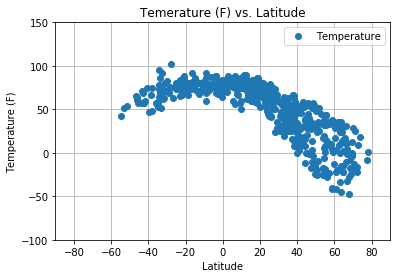

In [34]:
# Build a scatter plot for each data type

# plt.scatter(x = cities_df["Temperature"], y = cities_df["Latitude"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Latitude")

# plt.scatter(x=df['col2'], y=df['col4'], s=120, c='b', label='Highly Active')

# cities_df.plt.scatter(x = "Temperature", y = "Latitude",edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Latitude")

# plt.scatter(cities_df["Temperature"], cities_df["Latitude"])

cities_df.plot(x ='Latitude', y='Temperature', style='o')

# Incorporate the other graph properties
plt.title("Temerature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-100,150])

# Show plot
plt.show()

# Save the figure
plt.savefig("Temp-Lat.png")

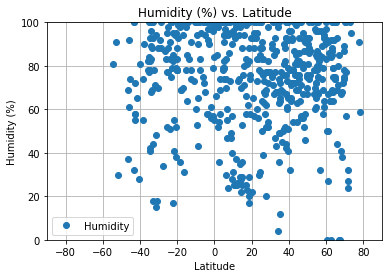

In [35]:
cities_df.plot(x ='Latitude', y ='Humidity', style='o')

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0,100])

# Show plot
plt.show()

# Save the figure
plt.savefig("Humid-Lat.png")

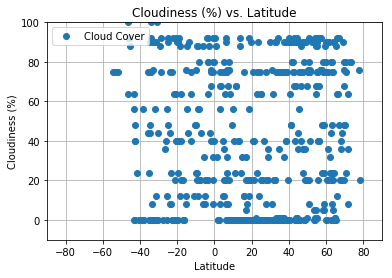

In [36]:
cities_df.plot(x ='Latitude', y ='Cloud Cover', style='o')

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,100])

# Show plot
plt.show()

# Save the figure
plt.savefig("Cloud-Lat.png")

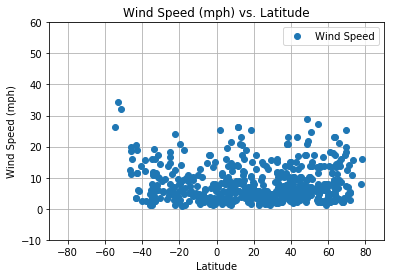

In [37]:
cities_df.plot(x ='Latitude', y ='Wind Speed', style='o')

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,60])

# Show plot
plt.show()

# Save the figure
plt.savefig("Wind-Lat.png")

In [39]:

# Observable Trends:
    
#     1. Temperature is maximum at cities near the equator and gradually drops as distance from the equator increases.
#     2. Majority of our cities have very high humidity (over 60%) and many have even 100% humidity which could be attributed to rainfall in large rain forests in the equatorial regions.
#     3. Wind speed is generally not dependent on latitude (between 0 and 20 mph) except when latitude is above 40 degrees.
#     4. Cloud coverage in general is independent of latitude even though many of these cities have almost no cloud coverage at al